In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [244]:
df = pd.read_csv('train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [246]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [247]:
df['HomePlanet'] = df['HomePlanet'].fillna('NAN')
df['CryoSleep'] = df['CryoSleep'].fillna('NAN')
df['Cabin'] = df['Cabin'].fillna('NAN')
df['Destination'] = df['Destination'].fillna('NAN')
df['VIP'] = df['VIP'].fillna('NAN')
df['Name'] = df['Name'].fillna('NAN')

df = df.fillna(df.median())

C:\Users\nazwa\AppData\Local\Temp\ipykernel_4884\945492965.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [248]:
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [249]:
df['Group'] = pd.to_numeric(df['PassengerId'].apply(lambda x: x.split('_')[0]))
df['Number'] = pd.to_numeric(df['PassengerId'].apply(lambda x: x.split('_')[1]))

df['CabinDeck'] = df['Cabin'].apply(lambda x: x.split('/')[0] if x != 'NAN' else x)
df['CabinNum'] = pd.to_numeric(df['Cabin'].apply(lambda x: x.split('/')[1] if x != 'NAN' else x), errors='coerce')
df = df.fillna(df.median())
df['CabinSide'] = df['Cabin'].apply(lambda x: x.split('/')[2] if x != 'NAN' else x)

df['FirstName'] = df['Name'].apply(lambda x: x.split(' ')[0] if x != 'NAN' else x)
df['LastName'] = df['Name'].apply(lambda x: x.split(' ')[1] if x != 'NAN' else x)

C:\Users\nazwa\AppData\Local\Temp\ipykernel_4884\2507073350.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [250]:
df['LogRoomService'] = np.log1p(df['RoomService'])
df['LogFoodCourt'] = np.log1p(df['FoodCourt'])
df['LogShoppingMall'] = np.log1p(df['ShoppingMall'])
df['LogSpa'] = np.log1p(df['Spa'])
df['LogVRDeck'] = np.log1p(df['VRDeck'])

In [251]:
df_group_size = df.groupby('Group').count()['PassengerId'].reset_index()
df_group_size.columns = ['Group', 'GroupSize']
df = pd.merge(left=df, right=df_group_size, on='Group')

In [252]:
df_family_size = df.groupby('LastName').count()['PassengerId'].reset_index()
df_family_size.columns = ['LastName', 'FamilySize']
df_family_size.loc[df_family_size['LastName'] == 'NAN', 'FamilySize'] = 1
df = pd.merge(left=df, right=df_family_size, on='LastName')

In [253]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Number,CabinDeck,CabinNum,CabinSide,FirstName,LastName,LogRoomService,LogFoodCourt,LogShoppingMall,LogSpa,LogVRDeck,GroupSize,FamilySize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0.0,P,Maham,Ofracculy,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0.0,S,Juanna,Vines,4.700480,2.302585,3.258097,6.309918,3.806662,1,4
2,1506_01,Earth,False,F/298/P,NAN,19.0,False,0.0,24.0,615.0,9.0,0.0,Bara Vines,True,1506,1,F,298.0,P,Bara,Vines,0.000000,3.218876,6.423247,2.302585,0.000000,1,4
3,5816_01,Earth,False,G/937/P,TRAPPIST-1e,31.0,False,1.0,0.0,7.0,0.0,387.0,Armene Vines,True,5816,1,G,937.0,P,Armene,Vines,0.693147,0.000000,2.079442,0.000000,5.961005,1,4
4,8143_01,Earth,False,F/1558/S,TRAPPIST-1e,18.0,False,0.0,17.0,5.0,0.0,712.0,Sergia Vines,True,8143,1,F,1558.0,S,Sergia,Vines,0.000000,2.890372,1.791759,0.000000,6.569481,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9193_01,Earth,NAN,G/1483/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,Camily Howence,False,9193,1,G,1483.0,S,Camily,Howence,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
8689,9203_01,Mars,True,F/1780/S,55 Cancri e,22.0,False,0.0,0.0,0.0,0.0,0.0,Kies Fort,True,9203,1,F,1780.0,S,Kies,Fort,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
8690,9219_01,Earth,False,G/1487/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Daley Workmanson,False,9219,1,G,1487.0,S,Daley,Workmanson,0.000000,0.000000,0.000000,0.000000,0.000000,2,2
8691,9219_02,Earth,False,F/1783/S,TRAPPIST-1e,51.0,False,6.0,0.0,0.0,0.0,1164.0,Robyna Workmanson,True,9219,2,F,1783.0,S,Robyna,Workmanson,1.945910,0.000000,0.000000,0.000000,7.060476,2,2


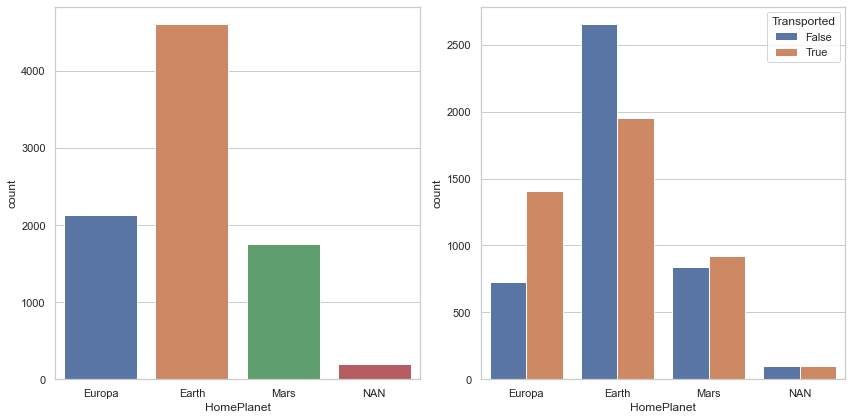

In [254]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='HomePlanet')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='HomePlanet', hue='Transported')

plt.tight_layout()
plt.show()

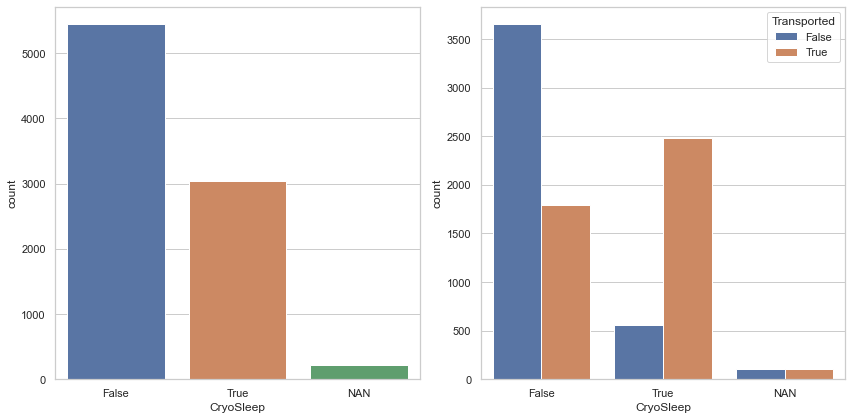

In [255]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='CryoSleep')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='CryoSleep', hue='Transported')

plt.tight_layout()
plt.show()

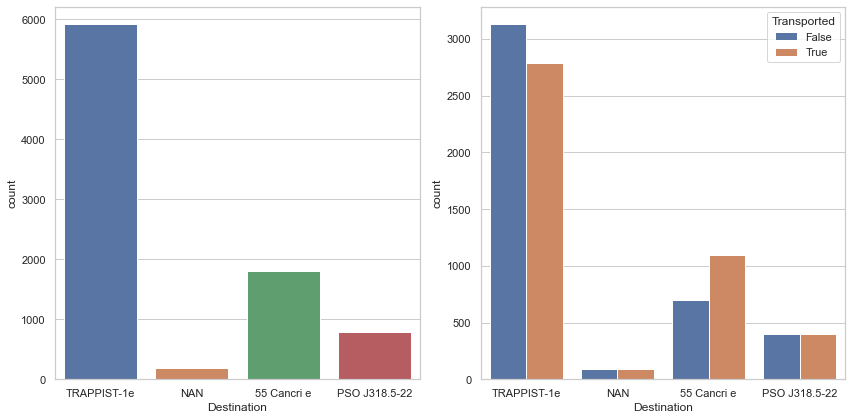

In [256]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Destination')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Destination', hue='Transported')

plt.tight_layout()
plt.show()

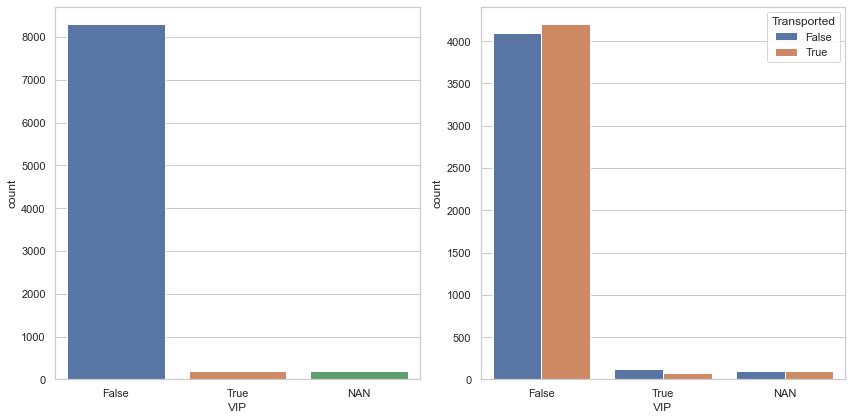

In [257]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='VIP')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='VIP', hue='Transported')

plt.tight_layout()
plt.show()

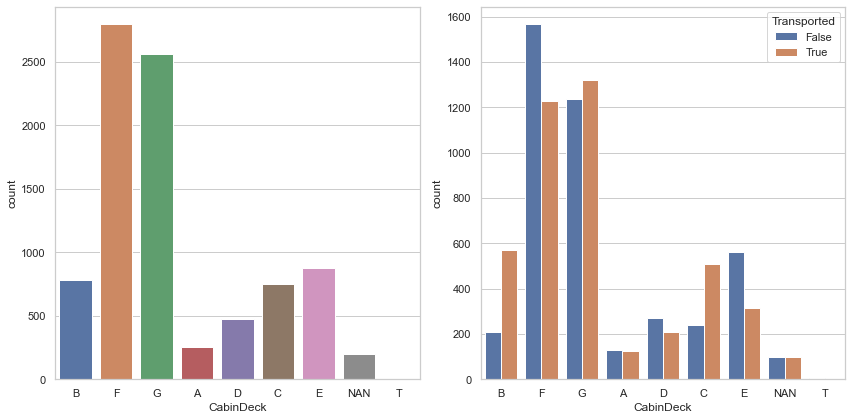

In [258]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='CabinDeck')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='CabinDeck', hue='Transported')

plt.tight_layout()
plt.show()

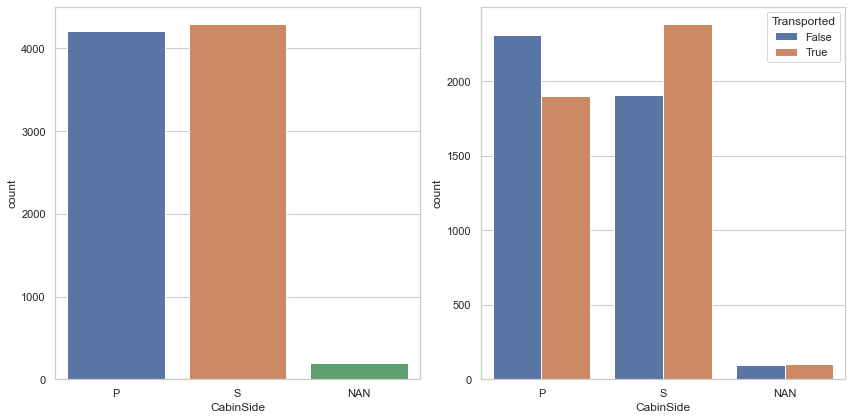

In [259]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='CabinSide')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='CabinSide', hue='Transported')

plt.tight_layout()
plt.show()

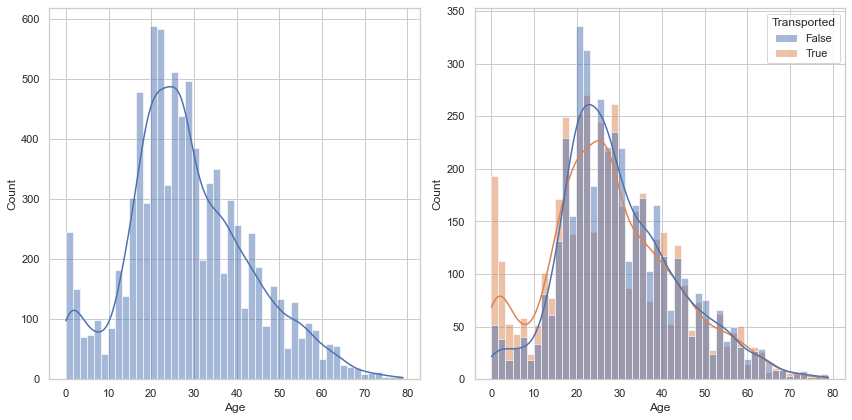

In [260]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Age', hue='Transported', kde=True)

plt.tight_layout()
plt.show()

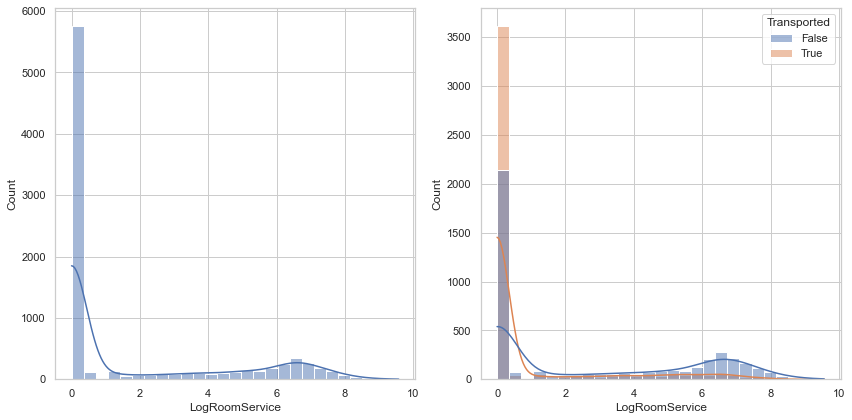

In [261]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='LogRoomService', kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='LogRoomService', hue='Transported', kde=True)

plt.tight_layout()
plt.show()

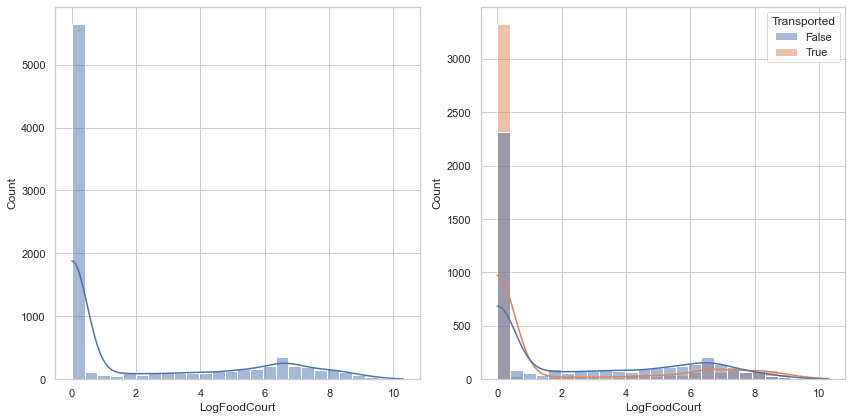

In [262]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='LogFoodCourt', kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='LogFoodCourt', hue='Transported', kde=True)

plt.tight_layout()
plt.show()

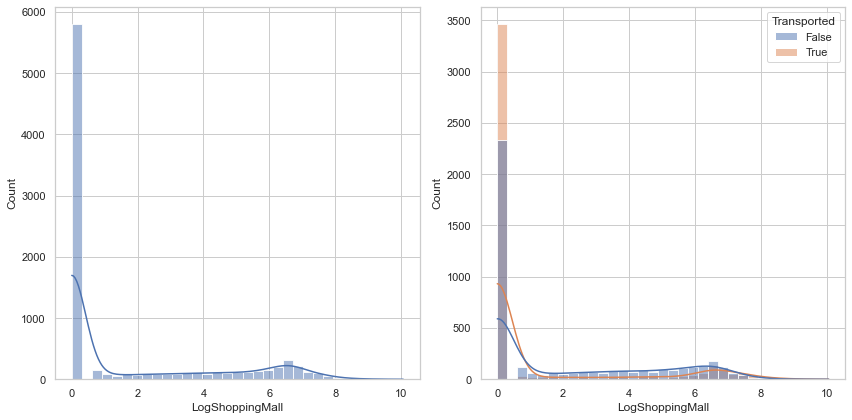

In [263]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='LogShoppingMall', kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='LogShoppingMall', hue='Transported', kde=True)

plt.tight_layout()
plt.show()

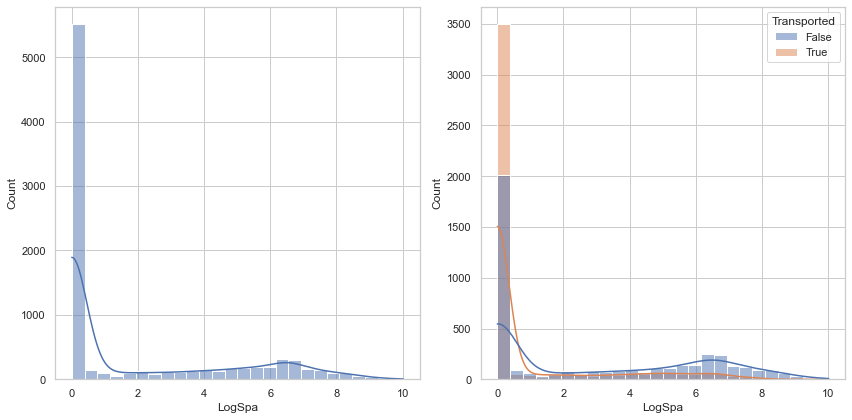

In [264]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='LogSpa', kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='LogSpa', hue='Transported', kde=True)

plt.tight_layout()
plt.show()

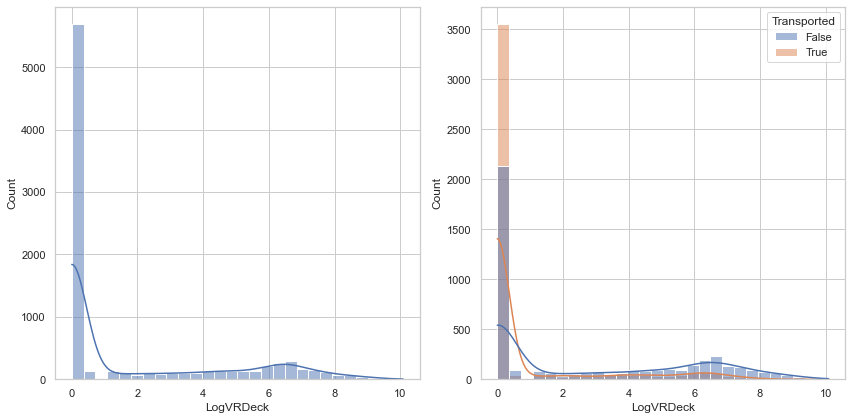

In [265]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='LogVRDeck', kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='LogVRDeck', hue='Transported', kde=True)

plt.tight_layout()
plt.show()

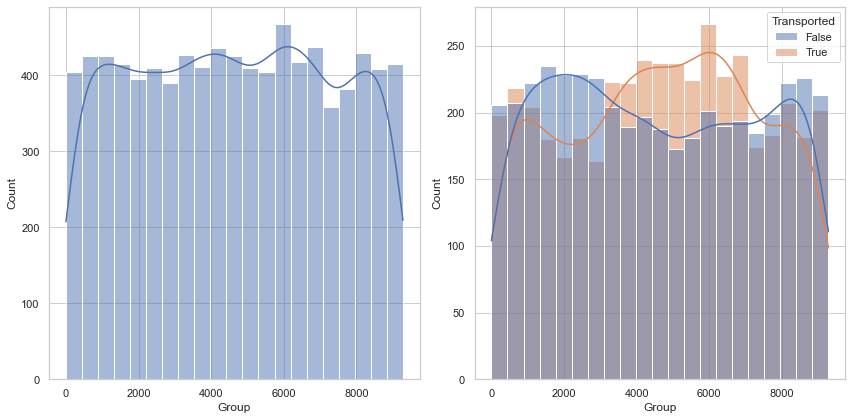

In [266]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Group', kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Group', hue='Transported', kde=True)

plt.tight_layout()
plt.show()

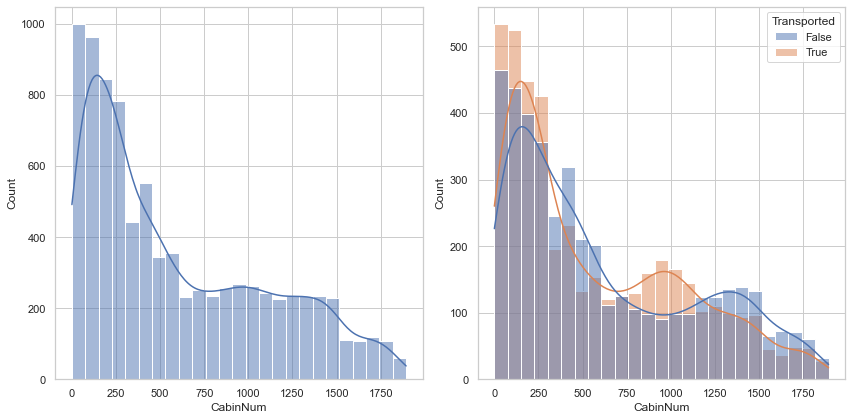

In [267]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='CabinNum', kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='CabinNum', hue='Transported', kde=True)

plt.tight_layout()
plt.show()

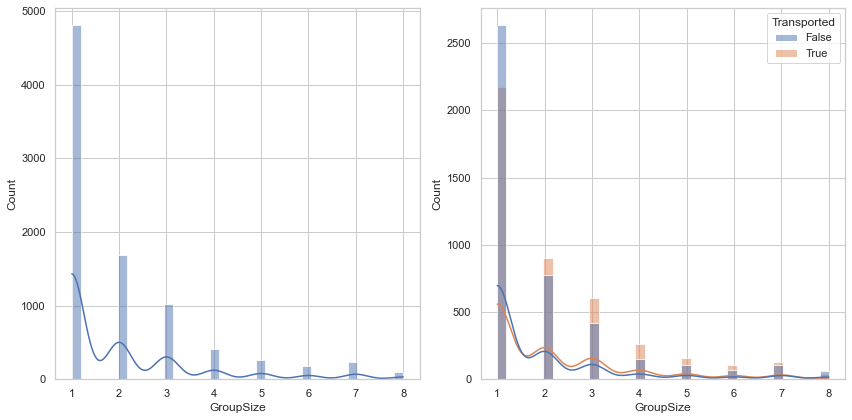

In [268]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='GroupSize', kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='GroupSize', hue='Transported', kde=True)

plt.tight_layout()
plt.show()

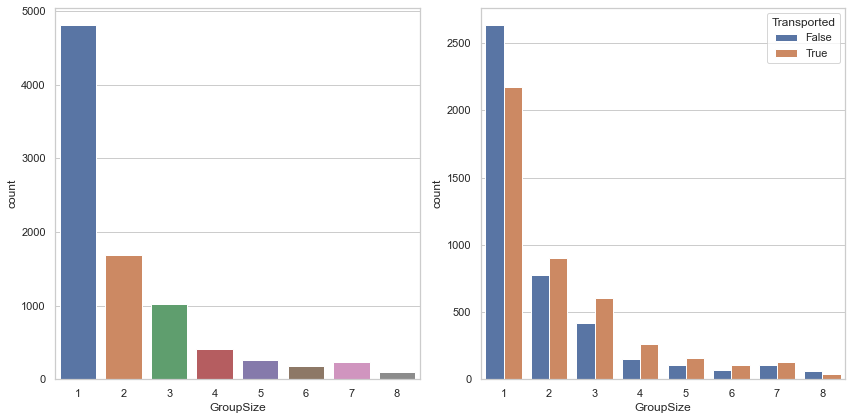

In [269]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='GroupSize')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='GroupSize', hue='Transported')

plt.tight_layout()
plt.show()

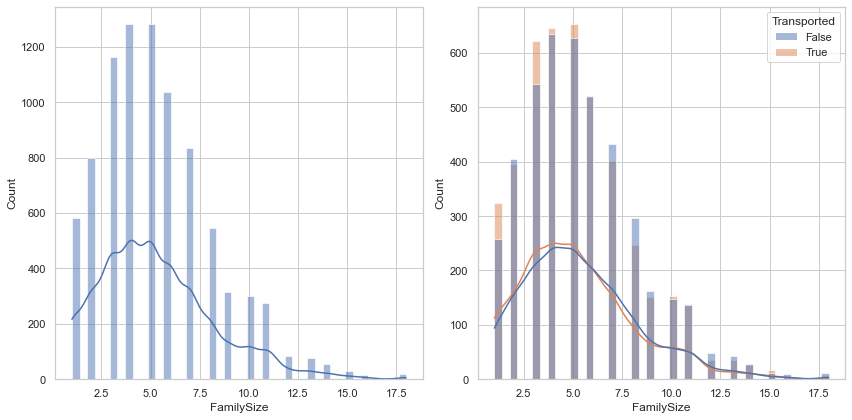

In [270]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='FamilySize', kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='FamilySize', hue='Transported', kde=True)

plt.tight_layout()
plt.show()

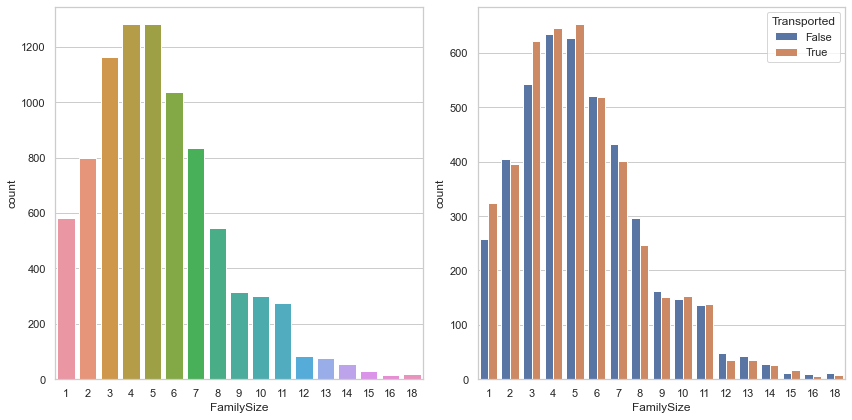

In [271]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='FamilySize')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='FamilySize', hue='Transported')

plt.tight_layout()
plt.show()

In [272]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [273]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Group', 'Number', 'CabinDeck', 'CabinNum',
       'CabinSide', 'FirstName', 'LastName', 'LogRoomService', 'LogFoodCourt',
       'LogShoppingMall', 'LogSpa', 'LogVRDeck', 'GroupSize', 'FamilySize'],
      dtype='object')

In [274]:
X = df[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'CabinDeck', 'CabinNum', 'CabinSide', 'GroupSize', 'FamilySize']]
y = df['Transported']

In [275]:
X = pd.get_dummies(X)

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [277]:
rfc = RandomForestClassifier(random_state=0)

In [278]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [279]:
y_pred = rfc.predict(X_test)

In [280]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.78      0.83      0.80       881
        True       0.81      0.76      0.79       858

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739

